# Honours Differential Equations
## Project Assignment

Due: Friday 2nd December 2022, noon

# Heather Napthine
# s2065896

## Question 1

Please **clearly** indicate where you answer each sub question by using a markdown cell.

In [1]:
#Import packages for all questions.
import sympy as sym
sym.init_printing()
from IPython.display import display_latex
import sympy.plotting as sym_plot
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
import math
from pandas import DataFrame
from mpl_toolkits.mplot3d import axes3d


Answer to part 1(a):

In [2]:
#Defines a function which will return a linear system.
def linearise(equations, coordinates):
    '''
     takes in a system of two equations and returns a system of linear equations in  u and v.
    
    inputs:
        equations: a system of two non- linear equations which we are required to solve.
        coordinates: a list of coordinatees which will be the critical points of our system.
    outputs:
        eigenvalues: the eigenvalues of the matrix in our returned linear system.
        eigenvectors[0][2][0]: the first eigenvector of the matrix in our returned linear system.
        eigenvectors[1][2][0]: the second eigenvector of the matrix in our returned linear system.
        finalsol: a system of linear equations in  u and v. 
    '''
    
    #Defines variables u and v as functions of our variable t.
    u = sym.Function('u')
    v = sym.Function('v')
    
    #Creates a matrix of the right hand sides of the equations in our system.
    FG = sym.Matrix([equations[0].rhs, equations[1].rhs])
    
    #Calculates the Jacobian matrix of partial derivatives for our system.
    jacobianmatrix = FG.jacobian([x(t), y(t)])
    
    #Evaluates the Jacobian matrix at the chosen point.
    linearmatrix = jacobianmatrix.subs({x(t):coordinates[0], y(t):coordinates[1]})
    
    #Calculates the eigenvalues of linearmatrix and lists them without their algebraic multiplicities.
    eigenvalues = list(linearmatrix.eigenvals().keys())
    eigenvectors = linearmatrix.eigenvects()
    
    #Produces the final linear system. 
    solution = linearmatrix*sym.Matrix([u(t),v(t)])
    sol1 = sym.Eq(u(t).diff(t),solution[0])
    sol2 = sym.Eq(v(t).diff(t),solution[1])
    finalsol=[sol1, sol2]
    
    return eigenvalues, eigenvectors[0][2][0], eigenvectors[1][2][0], finalsol

#Defines our variables x and y as functions of our variable t.
x = sym.Function('x')
y = sym.Function('y')
t = sym.symbols('t')
a = sym.symbols('a', constant=True)


#Defines the equations we need to solve.
equation1 = sym.Eq(x(t).diff(t),y(t))
equation2 = sym.Eq(y(t).diff(t),(-x(t)+a*(y(t)-(y(t)**3)/3)))


#Prints the linear approximations of the system around the only critical point, the origin.
print(f'The eigenvalues of the linear approximation of the system around the critical point, [0,0], are:')
display_latex(linearise([equation1, equation2],[0,0])[0])
print(f'The eigenvectors of the linear approximation of the system around the critical point, [0,0], are:')
display_latex(linearise([equation1, equation2],[0,0])[1])
print(f'and;')
display_latex(linearise([equation1, equation2],[0,0])[2])

The eigenvalues of the linear approximation of the system around the critical point, [0,0], are:


The eigenvectors of the linear approximation of the system around the critical point, [0,0], are:


and;


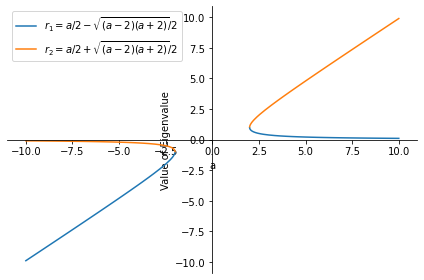

In [3]:
'''
We now plot the eigenvalues against a to analyise how differing values
of a will affect the behaviour of the critical point.
'''
#Use the linearise function to extract the two eigenvectors.
r1 = linearise([equation1, equation2],[0,0])[0][0]
r2 = linearise([equation1, equation2],[0,0])[0][1]

#Plots the solution for -10 < a < 10.
graph1 = sym_plot.plot(r1, r2, (a,-10,10), xlabel = 'a', ylabel = 'Value of Eigenvalue',
                       legend=True, show = False)


#Neaten up the legend.
graph1[0].label='$r_1 = a/2 - \sqrt{(a-2)(a+2)}/2$'
graph1[1].label='$r_2 = a/2 + \sqrt{(a-2)(a+2)}/2$'
graph1.show()

From the above plot it is obvious that for $a > 2$, we have both $r_1 > r_2 > 0$. And thus we should observe an unstable node both linearly and non-linearly. 

And similarly for $a < -2$, we have both $r_1 < r_2 < 0$ and thus we should observe an assymptotically stable node both linearly and non-linearly. 

Now since the eigenvalues of the matrix that defines our linearised system are $r_1, r_2 = \frac{a}{2} \pm \frac{\sqrt{(a-2)(a+2)}}{2}$ we clearly see that our eigenvalues are complex for $(a-2)(a+2) < 0$. This corresponds to the gap where $-2 < a < 2$ on the above plot. 

To further anyalyse the behaviour of the critical point for these complex eigenvalues we want to analyse the sign of $\lambda$, the real part of the eigenvalues. This corresponds to $\frac{a}{2}$.

So clearly for $a > 0$, we will have $\frac{a}{2} > 0$ and hence for $0 < a < 2$ we expect an unstable spiral both linearly and non-linearly. 

And similarly for $a < 0$, we will have $\frac{a}{2} < 0$ and hence for $-2 < a < 0$ we expect an assymptotically stable spiral both linearly and non-linearly.

Answer to part 1(b):

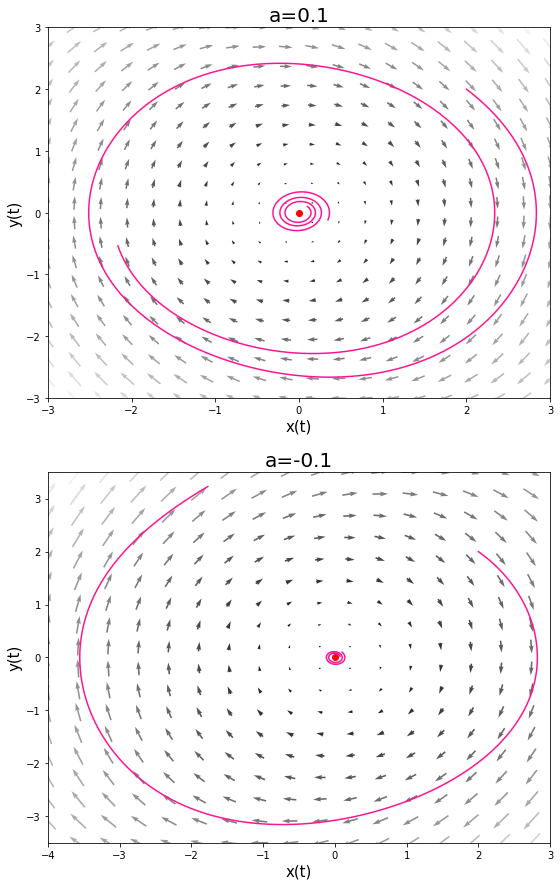

In [4]:
#Create the figure with two subplots, one for each value of b.
fig, ax = plt.subplots(2,1, figsize=(9, 15))

#Defines the vector field for a = 0.1.
def VectorField(x,t):
    u = x[1]
    v = - x[0] +0.1*(x[1]-(x[1]**3/3))
    return [u,v]

#Plot the vector field over a numpy meshgrid.
#Our grid extends from -3 to 3 on both axes in 20 intervals.
#This number of intervals was chosen so as not to over clutter the plot.
X, Y = np.mgrid[-3:3:20j,-3:3:20j]
U, V = VectorField([X,Y],0)

#Define the colour of the arrow for each vector based on their lengths
colorgradient = np.hypot(U, V)

#Plots the vector field using arrows.
#X and Y define the locations of the arrows and U and V give the length of each one.
ax[0].quiver(X, Y, U, V, [colorgradient], scale= 100, pivot = 'mid', cmap = plt.cm.gray)

'''
We create some settings for trajectories by inputting the specified initial conditions 
and deciding the duration over which to plot each trajectory.

Each duration is carefully chosen to help identify solution behaviour and so as not to 
overshoot our grid.

'''

#Specified initial conditions and corrresponding durations.
ics = [[0.1,0.1],[2,2]]
durations = [20,10]

#Creates a for loop in order to plot each individual trajectory.
#Note we use enumerate in order to allow us to match the places of the initial condition and
#its duration in our lists.
#to the value of the condition itself.
for i, conditionvalue in enumerate(ics):

    #Creates a vector of evenly spaced times spanning each duration. 
    time = np.linspace(0, durations[i], 800)
    
    #Solves the system of ODEs for each initial condition using SciPy odint function.
    x = odeint(VectorField, conditionvalue, time)
    
    #Plots the trajectory for each inital condition over all the times in its duration.
    ax[0].plot(x[:,0], x[:,1], color='deeppink')

#Adds dot to emphasise the location of the critical point using ax.scatter function.
ax[0].scatter(0,0, color='red')

#Defines the vector field for a = -0.1 now.
def VectorField(x,t):
    u = x[1]
    v = - x[0] -0.1*(x[1]-(x[1]**3/3))
    return [u,v]

#Repeat the above process for the new value of a.
#We now extend our grid from -3.5 to 3.5 in the y direction and from -4 to 4 on the x axis. 
#We have also edited the number of intervals.
#Both of these choices are made to suit our new solution and so as not to over clutter the plot.
X, Y = np.mgrid[-4:4:20j,-3.5:3.5:18j]
U, V = VectorField([X,Y],0)
colorgradient = np.hypot(U, V)
ax[1].quiver(X, Y, U, V, [colorgradient], scale= 100, pivot = 'mid', cmap = plt.cm.gray)

#Again we have changed the durations to suit the new solution and so as not to overshoot the plot.
ics = [[0.1,0.1],[2,2]]
durations = [13,5]

#Again repeat the above process for the new value of a but now plot on the second subplot.
for i, conditionvalue in enumerate(ics):
    time = np.linspace(0, durations[i], 800)
    x = odeint(VectorField, conditionvalue, time)
    ax[1].plot(x[:,0], x[:,1], color='deeppink')

#Again emphasise location of critical point.
ax[1].scatter(0,0, color='red')

#Set labels and titles for each subplot.
ax[0].set_ylabel('y(t)', fontsize = 15)
ax[0].set_xlabel('x(t)', fontsize = 15)
ax[0].set_title('a=0.1', fontsize = 20)
ax[1].set_ylabel('y(t)', fontsize = 15)
ax[1].set_xlabel('x(t)', fontsize = 15)
ax[1].set_title('a=-0.1', fontsize = 20)
ax[0].set_xlim(-3,3)
ax[0].set_ylim(-3,3)
ax[1].set_xlim(-4,3)
ax[1].set_ylim(-3.5,3.5)



We stated that for $0 < a < 2$ we expect an unstable spiral both linearly and non-linearly. Clearly we should expect this unstable spiral for $a = 0.1$. By observing the direction of the vector field we note this is exactly what we see for the trajectory with initial condition $(x(0),y(0)) = (0.1,0.1)$.

However we note that for the trajectory corresponding to the initial condition $(x(0),y(0)) = (2,2)$, we observe an inward spiral. This implies the existence of a closed trajectory between these two plotted trajectories.

And similarly for $-2 < a < 0$ we expected an assymptotically stable spiral both linearly and non-linearly. Looking closely at the behaviour near the origin (our critical point) this is again exactly what is observed for the trajectory with initial condition $(x(0),y(0)) = (0.1,0.1)$. We note that further from the origin, for the initial condition $(x(0),y(0)) = (2,2)$, the spiral appears to spiral outwards. This difference in direction of the two trajectories once again implies the existence of a closed trajectory, lying between these two plotted trajectories.

## Question 2

Please **clearly** indicate where you answer each sub question by using a markdown cell.

Answer to part 2(a):

In [5]:
#Defines our variables x and y as functions of our variable t.
#Defines a,b as constants.
x = sym.Function('x')
y = sym.Function('y')
t = sym.symbols('t')
a = sym.symbols('a', constant=True)
b = sym.symbols('b', constant=True)

#Defines the equations we need to solve.
equation3 = sym.Eq(x(t).diff(t),(a - x(t) - b*x(t) + (x(t)**2)*y(t) ))
equation4 = sym.Eq(y(t).diff(t), b*x(t) - (x(t)**2)*y(t))

#Creates a matrix of the right hand sides of said equations.
FG = sym.Matrix([equation3.rhs, equation4.rhs])

#Uses the sym.solve() function to solve for the values of x and y that make both equations equal to 0.
#We specifiy x(t) and y(t) since we dont look to solve for a and b.
#We specifiy set = True in order to return just the values on their own.
CPs = sym.solve(FG, x(t), y(t), set = True)

#Prints the results.
print(f'The one critical point of the system is:')
display_latex(CPs[1])

The one critical point of the system is:


In [6]:
#Prints the linear approximations of the system around our critical point.
#We also print the eigenvalues and eigenvectors of the corresponding Jacobian Matrix.
print(f'The linear approximation of the system around the critical point; (a, b/a) is:')
display_latex(linearise([equation3, equation4],[a,b/a])[3])
print(f'The eigenvalues of the linearised system around this critical point are:')
display_latex(linearise([equation3, equation4],[a,b/a])[0])
print(f'The eigenvectors of the linearised system around this critical point are:')
display_latex(linearise([equation3, equation4],[a,b/a])[1])
display_latex(linearise([equation3, equation4],[a,b/a])[2])

The linear approximation of the system around the critical point; (a, b/a) is:


The eigenvalues of the linearised system around this critical point are:


The eigenvectors of the linearised system around this critical point are:


Answer to part 2(b):

In [7]:
#Defines the equations we need to solve where now a=1.
equation3_a1 = sym.Eq(x(t).diff(t),(1 - x(t) - b*x(t) + (x(t)**2)*y(t) ))
equation4_a1 = sym.Eq(y(t).diff(t), b*x(t) - (x(t)**2)*y(t))

#Print the new eigenvalues in order to clearly anaylyse behaviour.
print(f'The eigenvalues of the Jacobian for our linear approximation with a=1 are now:')
display_latex(linearise([equation3_a1, equation4_a1],[1,b])[0])

The eigenvalues of the Jacobian for our linear approximation with a=1 are now:


Text(0.5, 1.0, 'b=3')

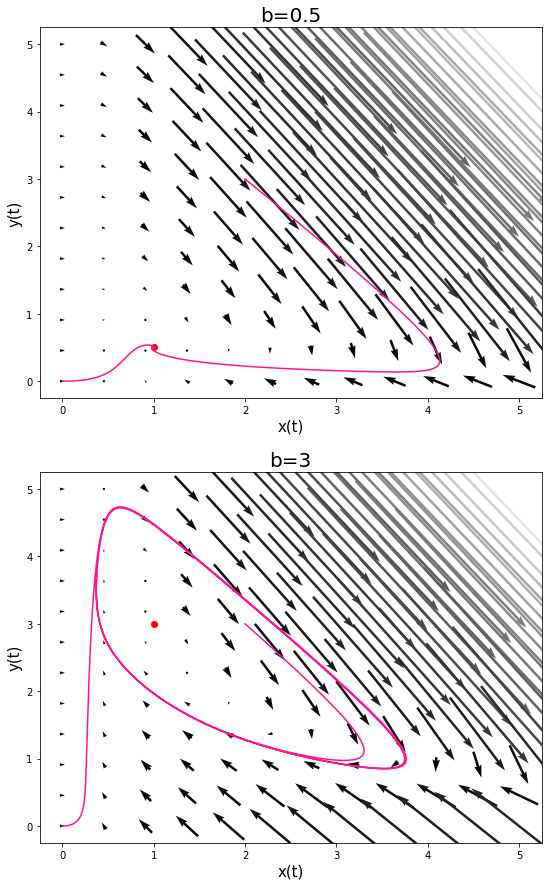

In [8]:
#Create the figure with two subplots, one for each value of b.
fig, ax = plt.subplots(2,1, figsize=(9, 15))

#Set the first value of b.
b=0.5

#Defines the vector field for a=1 and b=0.5.

def VectorField(x,t):
    u = 1-x[0]-b*x[0]+(x[0]**2)*x[1]
    v = b*x[0]-(x[0]**2)*x[1]
    return [u,v]

#Plot the vector field over a numpy meshgrid.
#Our grid extends from 0 to 5 on both axes as specified.
#We do this in 12 intervals.
#This number of intervals was chosen so as not to over clutter the plot.
X, Y = np.mgrid[0:5:12j,0:5:12j]
U, V = VectorField([X,Y],0)

#Define the colour of the arrow for each vector based on their lengths
colorgradient = np.hypot(U, V)

#Plots the vector field using arrows.
#X and Y define the locations of the arrows and U and V give the length of each one.
ax[0].quiver(X, Y, U, V, [colorgradient], scale= 100, pivot = 'mid', cmap = plt.cm.gray)

'''
We create some settings for trajectories by inputting the specified initial conditions 
and deciding the duration over which to plot each trajectory.

Each duration is carefully chosen to help identify solution behaviour and so as not to 
overshoot our grid.

'''

#Specified intial conditions and corresponding durations.
ics = [[0,0],[2,3]]
durations = [20,10]


#Creates a for loop in order to plot each individual trajectory.
#Note we use enumerate in order to allow us to match the places of the initial condition
#and its duration in our lists to the value of the condition itself.
#We do this twice, getting trajectories for each value of b.
for i, conditionvalue in enumerate(ics):

    #Creates a vector of evenly spaced times spanning each duration. 
    time = np.linspace(0, durations[i], 800)
    
    #Solves the system of ODEs for each initial condition using SciPy odint function.
    x = odeint(VectorField, conditionvalue, time)
    
    #Plots the trajectory for each inital condition over all the times in its duration.
    ax[0].plot(x[:,0], x[:,1], color='deeppink')

#Adds dot to emphasise the location of the critical point using ax.scatter function.
ax[0].scatter(1,b, color='red')

#Set the second value of b
b=3

#Defines the vector field for a=1 and b=3.
def VectorField(x,t):
    u = 1-x[0]-b*x[0]+(x[0]**2)*x[1]
    v = b*x[0]-(x[0]**2)*x[1]
    return [u,v]

#Repeat the above process for the new value of b.
X, Y = np.mgrid[0:5:12j,0:5:12j]
U, V = VectorField([X,Y],0)
colorgradient = np.hypot(U, V)
ax[1].quiver(X, Y, U, V, [colorgradient], scale= 100, pivot = 'mid', cmap = plt.cm.gray)

#Again repeat the above process for the new value of b but now plot on the second subplot.
for i, conditionvalue in enumerate(ics):
    time = np.linspace(0, durations[i], 800)
    x = odeint(VectorField, conditionvalue, time)
    ax[1].plot(x[:,0], x[:,1], color='deeppink')

ax[1].scatter(1,b, color='red')

#Set labels and titles for each subplot.
ax[0].set_ylabel('y(t)', fontsize = 15)
ax[0].set_xlabel('x(t)', fontsize = 15)
ax[0].set_title('b=0.5', fontsize = 20)
ax[1].set_ylabel('y(t)', fontsize = 15)
ax[1].set_xlabel('x(t)', fontsize = 15)
ax[1].set_title('b=3', fontsize = 20)

For b = 0.5, we have two complex eigenvalues of the form $\lambda \pm i\mu$ where $\lambda = -\frac{3}{4} < 0$ in both cases and thus we expect assymptotically stable solutions near our critical point.

In the first plot, where b = 0.5, for both the trajectory with initial condition $(x(0),y(0)) = (0,0)$ and $(x(0),y(0)) = (2,3)$ we observe assymptotically stable solutions which is exactly as expected given the eigenvalues for this value of b.  

However in the second where b = 3, we have two complex eigenvalues of the form $\lambda \pm i\mu$ where $\lambda = -\frac{1}{2} > 0$ in both cases and thus we expect unstable spiralling solutions near our critical point.

For the trajectory with initial condition $(x(0),y(0)) = (2,3)$ we observe what appears to be an unstable spiral as expected. However for the trajectory with initial condition $(x(0),y(0)) = (2,3)$, which further away from our critical point,the trajectory spirals inwards. We thus observe evidence of a periodic solution.

Answer to part 2(c):

Text(0.5, 1.0, 'b=2.25')

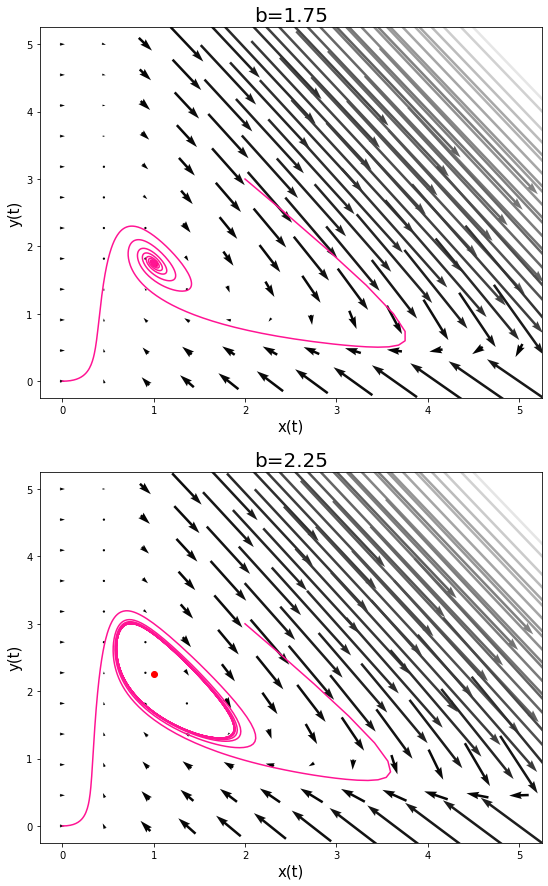

In [9]:
'''
Again I omit comments where the code is identitcal to that of the cell above.
'''

fig, ax = plt.subplots(2,1, figsize=(9, 15))

'''
I start by experimenting with b = 1.75.
'''
#Set this value of b.
b=1.75

#Defines the vector field for a=1 and b=1.75.
def VectorField(x,t):
    u = 1-x[0]-b*x[0]+(x[0]**2)*x[1]
    v = b*x[0]-(x[0]**2)*x[1]
    return [u,v]

#Repeat the above process for the new value of b.
X, Y = np.mgrid[0:5:12j,0:5:12j]
U, V = VectorField([X,Y],0)
colorgradient = np.hypot(U, V)
ax[0].quiver(X, Y, U, V, [colorgradient], scale= 100, pivot = 'mid', cmap = plt.cm.gray)

#Specified inital conditions and carefully chosen durations.
ics = [[0,0],[2,3]]
durations = [40,40]

for i, conditionvalue in enumerate(ics):
    time = np.linspace(0, durations[i], 800)
    x = odeint(VectorField, conditionvalue, time)
    ax[0].plot(x[:,0], x[:,1], color='deeppink')  

ax[0].scatter(1,b, color='red')

'''
Now I experiment with b = 2.25.
'''
b=2.25

#Defines the vector field for a=1 and b=2.25.
def VectorField(x,t):
    u = 1-x[0]-b*x[0]+(x[0]**2)*x[1]
    v = b*x[0]-(x[0]**2)*x[1]
    return [u,v]

#Repeat the above process for the new value of b.
X, Y = np.mgrid[0:5:12j,0:5:12j]
U, V = VectorField([X,Y],0)
colorgradient = np.hypot(U, V)
ax[1].quiver(X, Y, U, V, [colorgradient], scale= 100, pivot = 'mid', cmap = plt.cm.gray)

for i, conditionvalue in enumerate(ics):
    time = np.linspace(0, durations[i], 800)
    x = odeint(VectorField, conditionvalue, time)
    ax[1].plot(x[:,0], x[:,1], color='deeppink')

ax[1].scatter(1,b, color='red')

ax[0].set_ylabel('y(t)', fontsize = 15)
ax[0].set_xlabel('x(t)', fontsize = 15)
ax[0].set_title('b=1.75', fontsize = 20)
ax[1].set_ylabel('y(t)', fontsize = 15)
ax[1].set_xlabel('x(t)', fontsize = 15)
ax[1].set_title('b=2.25', fontsize = 20)

In [10]:
#Redefine x and y as functions rather than arrays defined above.
#Redefine b as an arbitary constant rather than the above value.
x = sym.Function('x')
y = sym.Function('y')
t = sym.symbols('t')
b = sym.symbols('b', constant=True)

#Reprint the eigenvalues obtained in part (a) as reminder.
print(f' Recall the eigenvalues obtained in part (a) where a = 1 are:')
display_latex(linearise([equation3_a1, equation4_a1],[1,b])[0])

 Recall the eigenvalues obtained in part (a) where a = 1 are:


We see that for b in the considered range ie. $0.5 \le b \le 3$, the value under our square root, $b(b-4) < 0$ and thus all of the considered eigenvalues are complex and are hence of the form $r_1,r_2 = \lambda \pm i\mu$

Thus the behaviour of our critical point depends on the sign of the real part of our eigenvalue which in this case is $ \lambda$ $= \frac{b}{2} - 1$. 

So we hence see that for $b > 2$, we will have $ \lambda > 0$ and we expect to observe an unstable sprial. 

And similarly for $b < 2$, we will have $\lambda < 0$ and we expect to observe an assymptotically stable spiral.

And thus we expect to observe a bifurication at b = 2.

For $b = 1.75$, where $\lambda < 0$ we observe an assymptotically stable spiral as expected.

For $b = 2.25$, where $\lambda > 0$ we observe an inwardly spiralling solution as expected.

We hence see that for some value of b such that $1.75 \le b \le 2.25$ a bifurcation has occured, which is exactly what we predicted above.

Answer to part 2(d):

Text(0.5, 1.0, 'y(t) versus t')

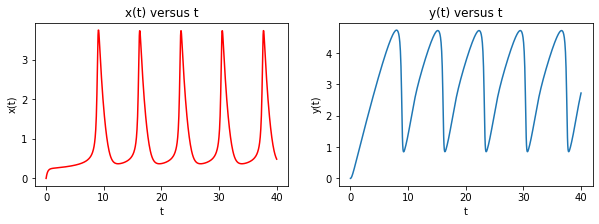

In [11]:
#Create two subplots on one figure
fig, ax = plt.subplots(1,2, figsize=(10,3))

#Reset b to be 3
b=3
       
#Set the range of t over which we will plot our solutions.
time = np.linspace(0, 40, 800)

#Calculate our solutions x(t) and y(t) using the intial conditions [(x(0),y(0))=(0,0)], using the odeint function.
x = odeint(VectorField, [0,0], time)

#Plot x(t) and y(t) on separate subplots.
ax[0].plot(time, x[:,0], color = 'red')
ax[1].plot(time, x[:,1])

#Set labels and titles for each subplot.
ax[0].set_ylabel('x(t)')
ax[0].set_xlabel('t')
ax[0].set_title('x(t) versus t')
ax[1].set_ylabel('y(t)')
ax[1].set_xlabel('t')
ax[1].set_title('y(t) versus t')

The above subplots clearly show that both the x(t) and y(t) solutions exhibit periodic behaviour, with the same period.

This clearly accounts for what we observed on the above phase portraits for $b > 2$.

## Question 3

Please **clearly** indicate where you answer each sub question by using a markdown cell.

Answer to part 3(a):

In [12]:
'''
We first create functions which integrates our system using the two specified methods: 
Euler and ModifiedEuler.
'''

#We start with Euler.
#We need this function to create the final table.
def Euler_using_times(func, times, ics):
    '''
    integrates the given system using forward Euler method
    
    inputs:
        func: the RHS of the given ODE
        times: the given points in time 
        ics: initial condition
    output:
        y: the solution of our ODE. 
    '''
    
    times = np.array(times)
    ics = np.array(ics)
    n = ics.size        
    numberofsteps = times.size    
    y = np.zeros([numberofsteps, n])
    #calculates our solution using given initial conditions
    y[0, :] = ics
    #calculate y at each time step using the original euler formula
    for k in range(numberofsteps-1):
        y[k+1, :] = y[k, :] + (times[k+1]-times[k])*func(y[k, :], times[k])
    return y

#Now we define the modified euler function.
def ModifiedEuler_using_times(func, times, ics):
    '''
    integrates the given system using modified Euler method
    
    inputs:
        func: the RHS of the given ODE
        times: the given points in time 
        ics: initial condition
    output:
        y: the solution of our ODE. 
    '''
    
    times = np.array(times)
    ics = np.array(ics)
    n = ics.size        
    numberofsteps = times.size    
    y = np.zeros([numberofsteps, n])
    #calculates our solution using given initial conditions
    y[0, :] = ics
    #calculate y at each time step using the modified formula
    for k in range(numberofsteps-1):
        h = (times[k+1]-times[k])
        y[k+1, :] = y[k, :] + h*(func(y[k, :] + 0.5*h*func(y[k, :], times[k]), times[k] + 0.5*h))
    return y

#We now define a timestep function.
def timesteps(start, stop, h):
    '''
    calculates the actual times from a given interval and stepsize 
    
    inputs:
        start: the intial time
        stop: the final time 
        h: the size of the fixed timestep 
        ics: initial condition
    outputs:
        times: the actual times evaluated by dividing the interval over the desired number of steps 
    '''
    #We use the math.ceil() function to round up.
    #This means our number of steps is always an integer value.
    numberofsteps = math.ceil((stop - start)/h)
    return np.linspace(start, start+numberofsteps*h, numberofsteps+1)

#Function to convert outputs from Euler_using_times.
def Euler(func, start, stop, h, ics):
    tvalues = timesteps(start, stop, h)
    solutions = Euler_using_times(func, tvalues, ics)
    return solutions, tvalues

#Function to convert outputs from ModifiedEuler_using_times.
def ModifiedEuler(func, start, stop, h, ics):
    tvalues = timesteps(start, stop, h)
    solutions = ModifiedEuler_using_times(func, tvalues, ics)
    return solutions, tvalues

Answer to part 3(b):

In [13]:
#Define t as a symbol.
t = sym.symbols('t')

#Defines our variable y as functions of our variable t.
y = sym.Function('y')

#Defining the function in the RHS of the ODE given in the question.
def equation(y, t):
    return 5*t - 2*(y**(1/2))

#Defines a Data Frame function.
def make_data_frame(method, func, start, stop, h, ics):
    '''
    creates collumns of data that match the time values to the solutions 
    
    inputs:
        method: the numerical method used
        func: the RHS of the given ODE 
        start: the intial time
        stop: the final time 
        h: the size of the fixed timestep 
        ics: initial condition
    outputs:
        DFrame: collumns of data that match the time values to the solutions 
    '''
    solutions, tvalues = method(func, start, stop, h, ics)
    DFrame =  DataFrame(data = solutions, index = np.round(tvalues,3), columns = [str(method)])
    return DFrame

#Create the data for the ModifiedEuler formula.
dfs = [make_data_frame(method, equation, 0, 1, 0.05, 2) for method in [ModifiedEuler]]
ModifiedEulerTable = dfs[0]

#Rename the collumns in our table to neaten up the results.
ModifiedEulerTable.rename(columns={ ModifiedEulerTable.columns[0]: "Modified Euler, h=0.05"},
                          inplace = True)
ModifiedEulerTable.index.name= 't'

display(ModifiedEulerTable)

,"Modified Euler, h=0.05"
t,
0.00,2.000000
0.05,1.867351
0.10,1.751741
0.15,1.652681
0.20,1.569657
0.25,1.502133
0.30,1.449553
0.35,1.411352
0.40,1.386962


Answer to part 3(c):

In [14]:
#Defines the equation we need to solve.
equation_Q3 = sym.Eq(y(t).diff(t), 5*t-2*sym.sqrt(y(t)))

#Solve the equation.
#We assign the hint best in order to return the simplest solution.
equation_Q3_sol = sym.dsolve(equation_Q3, y(t), ics={y(0):2}, hint = 'best')

#Print the equation and its solution.
print("The equation")
display_latex(equation_Q3)
print("has the exact solution:")
display_latex(equation_Q3_sol)

The equation


has the exact solution:


Answer to part 3(d):

,"Euler, h=0.05","Modified Euler, h=0.05",Exact
t,,,
0.0,2.000000,2.000000,2.000000
0.1,1.734749,1.751741,1.751547
0.2,1.537944,1.569657,1.569274
0.3,1.405438,1.449553,1.448928
0.4,1.332687,1.386962,1.385810
0.5,1.314973,1.377377,1.374799
1.0,1.906060,1.990196,1.896081


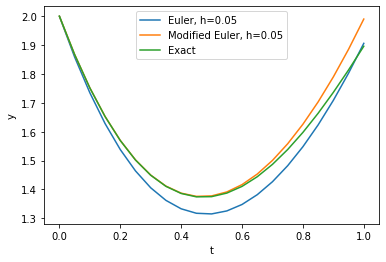

In [15]:
#Create a function which calculates the exact solution. 
def oursolution(t):
    return 2 - 2*(2**(1/2))*t + (7*(t**2))/2 - (5*(2**(1/2))*(t**3))/12 - (5*(t**4))/24 + (2**(1/2))*(t**5)/64

#Create a function which calculates the exact solution using the same aruments as our Euler functions.
#This allows us to join the exact solution to the same dataframe and our Euler collumns.
def oursolutionvalues(start, stop, h):
    tvalues = timesteps(start, stop, h)
    solutions = oursolution(tvalues)
    return solutions

#Joins the dataframes for Euler and ModifiedEuler in a table.
dfs2 = [make_data_frame(method, equation, 0, 1, 0.05, 2) for method in [Euler, ModifiedEuler]]
FullTable = dfs2[0].join(dfs2[1:])

#Adds a collumn containing the exact solution.
FullTable['Exact'] = (oursolutionvalues(0, 1, 0.05))

#Rename the collumns in our table to neaten up the table and the legend on the plot.
FullTable.rename(columns={ FullTable.columns[0]: "Euler, h=0.05"}, inplace = True)
FullTable.rename(columns={ FullTable.columns[1]: "Modified Euler, h=0.05"}, inplace = True)

#Title the index collumn t.
FullTable.index.name= 't'

#Plot the results from the table.
#This plots our solution, y(t) against each corresponding t value, calculated by each method.
#We also label the axes as t and y. 
FullTable.plot(xlabel = 't', ylabel = 'y')

#Filter the desired values for our reduced table.
FilteredTable = FullTable.filter( items = [0.0,0.1,0.2,0.3,0.4,0.5,1.0], axis=0)

#Display filtered table.
display(FilteredTable)

## Question 4

Please **clearly** indicate where you answer each sub question by using a markdown cell.

Write your written solution here. You may have to include extra markdown cells.

Answer to part 4(a):

In [16]:
'''
First we calculate the crtitical points of our system, so that we can plot them on our 3D 
phase portrait. 
'''

#Redefine t as a symbol.
t = sym.symbols('t')

#Define our variables x, y, z, u, v and w as functions of our variable t.
x = sym.Function('x')
y = sym.Function('y')
z = sym.Function('z')
u = sym.Function('u')
v = sym.Function('v')
w = sym.Function('w')

#Defines the equations we need to solve.
equation1_q4 = sym.Eq(x(t).diff(t), (-y(t)-z(t)))
equation2_q4 = sym.Eq(y(t).diff(t), (x(t))+ (1/5)*y(t))
equation3_q4 = sym.Eq(z(t).diff(t), (1/5) + (x(t) -(5/2))*z(t))  

#Creates a matrix of the right hand sides of said equations.
FG = sym.Matrix([equation1_q4.rhs, equation2_q4.rhs, equation3_q4.rhs])

#Uses the sym.solve() function to solve for the values of x, y and z
#that make all three equations equal to 0.
CPs = sym.solve(FG)

#Retrieve just the values of the coordinates of one critical point which
#we will then linearise around.
first_CP_values = list(CPs[0].values())

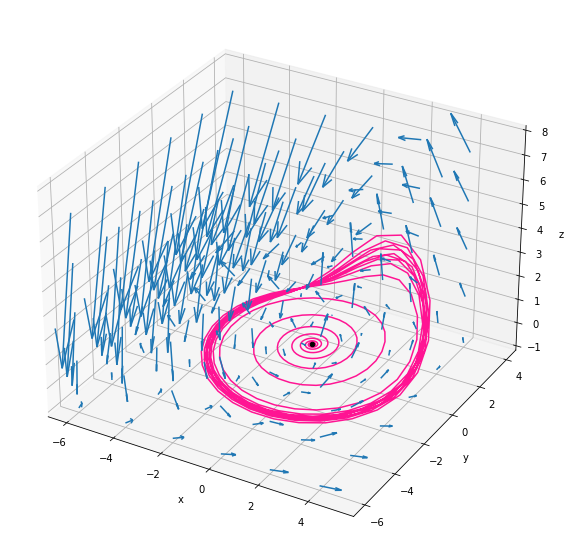

In [17]:
'''
We now define our vector field and produce the plot of our phase space.
'''
#Create the vector field.
def VectorField(x,t):

    u = - x[1] - x[2]
    v = x[0] + (1/5)*x[1]
    w = 1/5 + (x[0] - (5/2))*(x[2])
    return [u,v,w]

#Create a 3D vector field over a 3D meshgrid.
X, Y, Z = np.meshgrid(np.arange(-6, 6, 2),
                      np.arange(-6, 6, 2),
                      np.arange(-1, 8, 2))
U, V, W = VectorField([X,Y,Z],0)

#Create the figure and set up the 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

#Plots the vector field using arrows.
#X, Y and Z define the locations of the arrows and U, V and W give the direction of each one.
#We set the length so as to produce a tidy plot.
ax.quiver(X, Y, Z, U, V, W, length = 0.1, normalize=False)

#Creates a vector of evenly spaced times spanning our chosen duration. 
time = np.linspace(0, 100, 500)
    
#Solves the system of ODEs for the given initial condition using SciPy odint function.
x = odeint(VectorField, [0,0,0], time)
    
#Plots the trajectory for each inital condition over all the times in its duration.
ax.plot3D(x[:,0], x[:,1], x[:,2], color='deeppink')

#Adds dot to emphasise location of the critical point using ax.scatter function.
ax.scatter(first_CP_values[0], first_CP_values[1], first_CP_values[2], color='black')

#Adds labels to the axes and sets the limits for the z axis.
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_zlim(-1,8)

#Show the plot.
plt.show()

Answer to part 4(b):

Text(0.5, 1.0, 'y(t) versus t')

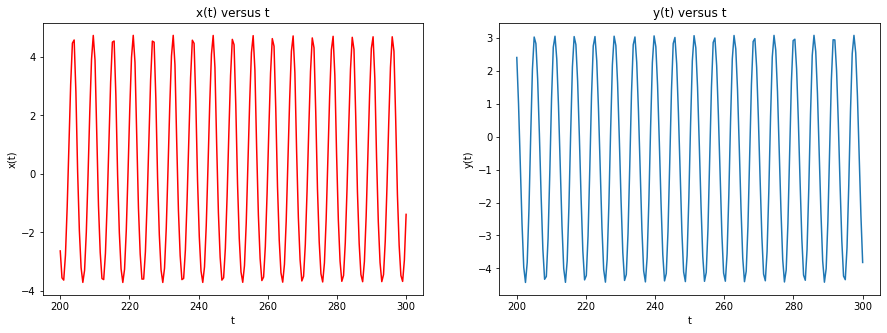

In [18]:
'''
We now produce a 2D plot starting from large t.

We will begin by solving our system using the intial conditions [(x(0),y(0),z(0))=(0,0,0)], 
before selecting a large value of t (t = 200) from which to start plotting.

We will then plot the solutions for x(t) and y(t), over the range, 200 < t < 300 and look for
evidence of periodic behaviour.
'''

#Create two subplots on one figure
fig, ax = plt.subplots(1,2,figsize=(15,5))

#Set the range of t over which we will plot our solutions.
time = np.linspace(0, 300, 600)

#Calculate our solutions x(t) and y(t) using the intial conditions [(x(0),y(0))=(0,0)], using the odeint function.
x = odeint(VectorField, [0,0,0], time)

#Create the vector of larger times only (we miss out t < 200).
#We then plot our solutions over this interval.
shortenedtime = np.linspace(200, 300, 200)

#Plot x(t) and y(t) for 200 < t < 300 on separate subplots.
ax[0].plot(shortenedtime, x[400:,0], color = 'red')
ax[1].plot(shortenedtime, x[400:,1])

#Set labels and titles for each subplot.
ax[0].set_ylabel('x(t)')
ax[0].set_xlabel('t')
ax[0].set_title('x(t) versus t')
ax[1].set_ylabel('y(t)')
ax[1].set_xlabel('t')
ax[1].set_title('y(t) versus t')

Answer to part 4(c):

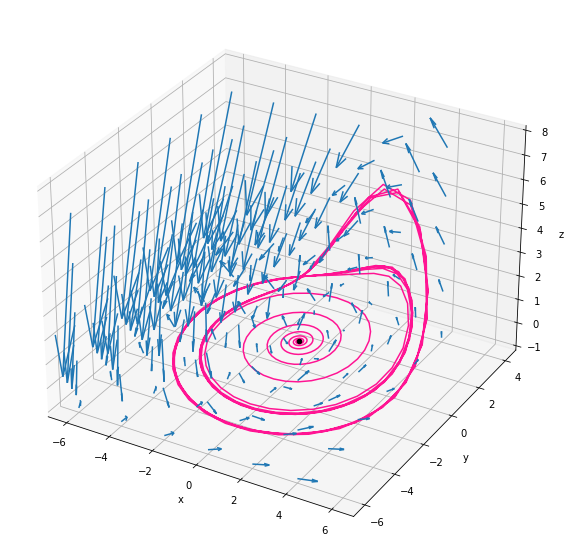

In [19]:
'''
We now follow the above process but with a new coeffecient of 3.

We again start by finding the critical points so we can plot them on our 3D phase space.

We then, once again define the new vector field and produce the plot of our phase space.

Again I omit comments where the code is identical to that above.
'''
#Redefine t as a symbol.
t = sym.symbols('t')

#Define our variables x, y, z, u, v and w as functions of our variable t.
x = sym.Function('x')
y = sym.Function('y')
z = sym.Function('z')
u = sym.Function('u')
v = sym.Function('v')
w = sym.Function('w')

#Defines the equations we need to solve where the coeffecient is now 3 rather than 5/2.
equation1_q4_with3 = sym.Eq(x(t).diff(t), (-y(t)-z(t)))
equation2_q4_with3 = sym.Eq(y(t).diff(t), (x(t))+ (1/5)*y(t))
equation3_q4_with3 = sym.Eq(z(t).diff(t), (1/5) + (x(t) -(3))*z(t))  

FG3 = sym.Matrix([equation1_q4_with3.rhs, equation2_q4_with3.rhs, equation3_q4_with3.rhs])

CPs3 = sym.solve(FG3) 

#Retrieve just the values of the coordinates of one critical point which we will then linearise around.
first_CP_values3 = list(CPs3[0].values())


#Defines the new vector field where the coeffecient is now 3.
def NewVectorField_with3(x,t):

    u = - x[1] - x[2]
    v = x[0] + (1/5)*x[1]
    w = 1/5 + (x[0] - (3))*x[2]
    return [u,v,w]

X, Y, Z = np.meshgrid(np.arange(-6, 6, 2),
                      np.arange(-6, 6, 2),
                      np.arange(-1, 8, 2))


U, V, W = NewVectorField_with3([X,Y,Z],0)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.quiver(X, Y, Z, U, V, W, length =  0.1, normalize=False)

time = np.linspace(0, 100, 500)
x = odeint(NewVectorField_with3, [0,0,0], time)
ax.plot3D(x[:,0], x[:,1], x[:,2], color='deeppink')

ax.scatter(first_CP_values3[0], first_CP_values3[1], first_CP_values3[2], color='black')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.set_zlim(-1,8)

plt.show()

We see that replacing the coeffecient 5/2 with 3 increases the width of our periodic trajectory. 

When we use 5/2 we see that our periodic trajectory spans the space from around -5 to 3 on the x axis and around -3 to 5 on the y axis.

However when we replace the coeffecient with 3 we see this trajectory widen, spanning the space from around -6 to 4.5 on the x axis and around -4 to 5 on the y axis.

We further illustrate this larger periodic trajectory by once again plotting x(t) and y(t) against t on the same plot and noting the increased amplitudes of the x and y displacement.

Text(0.5, 1.0, 'y(t) versus t, where coeffecient is 5/2')

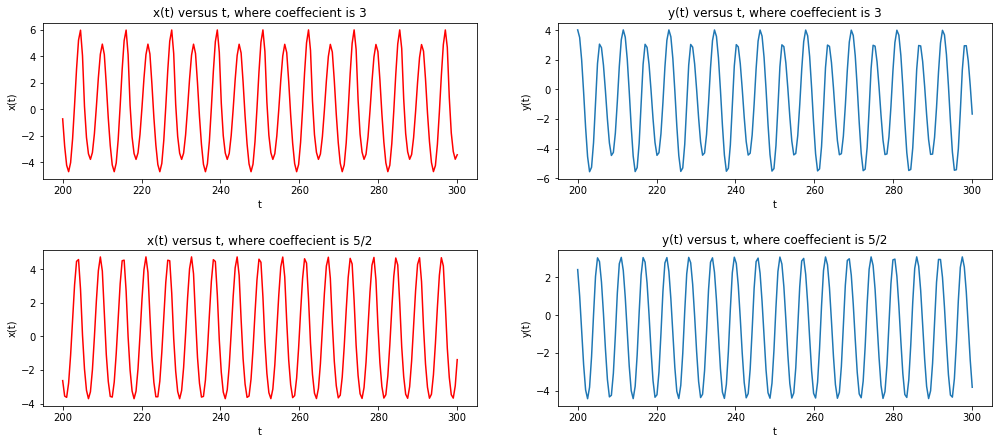

In [20]:
'''
To further analyse the effect of the new coeffecient we shall once again produce a 2D plot
starting from large t. We will plot the solution over the same range 200 < t < 300, and we
will provide both sets of plots in order to create a clear comparison.

We will once again begin by solving our system using the intial conditions [(x(0),y(0),z(0))=(0,0,0)], 
before selecting a large value of t (t = 200) from which to start plotting.

We will then plot the solutions for x(t) and y(t), over the range, 200 < t < 300 and again look for
evidence of periodic behaviour.

We shall then show both x(t) and y(t) for both values of the coeffecient on four separate subplots.

Again, I omit comments where the code is identical to that above.
'''

fig, ax = plt.subplots(2,2,figsize=(15,7))

#Neaten up the layout now that we have multiple rows of plots.
fig.tight_layout(pad=5.0)

time = np.linspace(0, 300, 600)

#Redefine our array of solutions for the coeffecient 5/2.
x = odeint(VectorField, [0,0,0], time)

#Calculate an array of solutions for the coeffecient 3.
new_x = odeint(NewVectorField_with3, [0,0,0], time)

#Plot all four solutions.
ax[0,0].plot(shortenedtime, new_x[400:,0], color = 'red')
ax[0,1].plot(shortenedtime, new_x[400:,1])
ax[1,0].plot(shortenedtime, x[400:,0], color = 'red')
ax[1,1].plot(shortenedtime, x[400:,1])


#Set labels and titles for each subplot.
ax[0,0].set_ylabel('x(t)')
ax[0,0].set_xlabel('t')
ax[0,0].set_title('x(t) versus t, where coeffecient is 3')
ax[0,1].set_ylabel('y(t)')
ax[0,1].set_xlabel('t')
ax[0,1].set_title('y(t) versus t, where coeffecient is 3')
ax[1,0].set_ylabel('x(t)')
ax[1,0].set_xlabel('t')
ax[1,0].set_title('x(t) versus t, where coeffecient is 5/2')
ax[1,1].set_ylabel('y(t)')
ax[1,1].set_xlabel('t')
ax[1,1].set_title('y(t) versus t, where coeffecient is 5/2')

We clearly from the values on the vertical axis that changing the coeffecient from 5/2 to 3 increases the amplitude of both the x and y displacement for our trajectory and thus, as we saw in our 3D phase space, this change increases the width of our periodic trajectory.

We also see that changing the coeffecient from 5/2 to 3 increases the period of both x(t) and y(t) and thus increases the period of our overall trajectory in our 3D phase space.